In [1]:
include("../resk.jl")

RESK successfully loaded.


In [2]:
@time rangeexp_1d(20,40,8;distributed=true)

RESK successfully loaded.
  3.344554 seconds (17.20 M allocations: 412.539 MiB, 2.49% gc time, 64.40% compilation time)


Dict{String, Any} with 9 entries:
  "AAsel" => NaN
  "pops"  => Float32[42.0 38.0 … 34.0 31.0; 33.0 24.0 … 29.0 23.0; … ; NaN NaN …
  "aasel" => NaN
  "fitn"  => Float32[1.0 1.0 … 0.991146 0.989494; 1.0 1.0 … 0.992045 0.9916; … …
  "aaneu" => NaN
  "Aasel" => NaN
  "Aaneu" => NaN
  "AAneu" => NaN
  "stats" => Dict{String, Any}("wlddim"=>1, "r_prolif_rate"=>1.8, "max_burnin"=…

In [4]:
@time rangeexp_1d(20,40,8;distributed=false)

  8.996750 seconds (122.58 M allocations: 2.223 GiB, 0.76% gc time, 0.07% compilation time)


Dict{String, Any} with 9 entries:
  "AAsel" => NaN
  "pops"  => Float32[38.0 32.0 … 23.0 18.0; 39.0 22.0 … 21.0 25.0; … ; NaN NaN …
  "aasel" => NaN
  "fitn"  => Float32[1.0 1.0 … 0.99449 0.99452; 1.0 1.0 … 0.991477 0.991404; … …
  "aaneu" => NaN
  "Aasel" => NaN
  "Aaneu" => NaN
  "AAneu" => NaN
  "stats" => Dict{String, Any}("wlddim"=>1, "r_prolif_rate"=>1.8, "max_burnin"=…

Clearly there is a difference in using distributed processing vs a single process. Let's scale this up and save the times for simulations with 1 to 10 iterates / processes:

In [ ]:
thread_times = Array{Float64}(undef,10)
nothread_times = Array{Float64}(undef,10)

for j in 1:10
    temp_res, thread_times[j] = @timed rangeexp_1d(50,150,j;distributed=true)
    temp_res, nothread_times[j] = @timed rangeexp_1d(50,150,j;distributed=false)
end

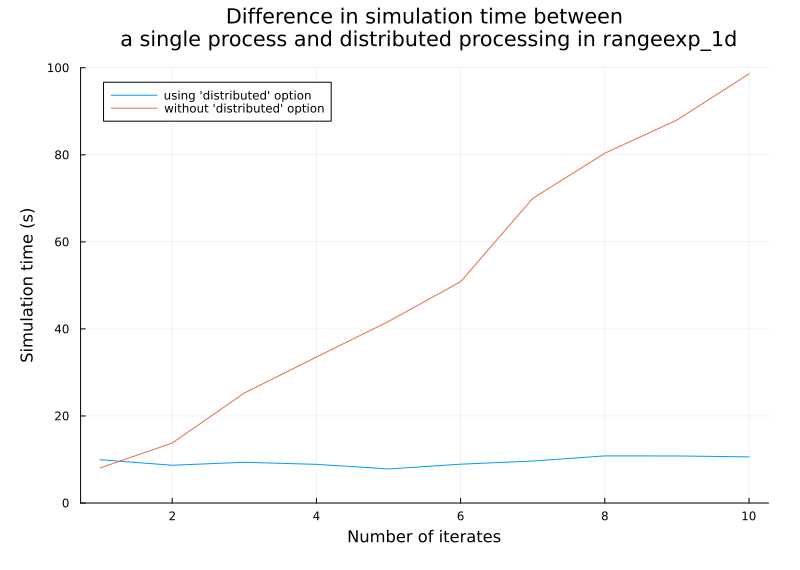

In [4]:
Plots.plot(thread_times,ylabel="Simulation time (s)",size=(800,570),ylims=(0,100),xlabel="Number of iterates",label="using 'distributed' option",title="Difference in simulation time between\n a single process and distributed processing in rangeexp_1d")
Plots.plot!(nothread_times,label="without 'distributed' option")

That is the main result we wanted to see in this short example.

Finally, let's just confirm that our simulations are working and non-trivial:

In [7]:
temp_res = rangeexp_1d(50,150,1;distributed=true)

Dict{String, Any} with 9 entries:
  "AAsel" => NaN
  "pops"  => Float32[12.0 17.0 … 14.0 22.0; 17.0 19.0 … 14.0 11.0; … ; NaN NaN …
  "aasel" => NaN
  "fitn"  => Float32[1.0 1.0 … 0.949287 0.947162; 1.0 1.0 … 0.959044 0.953952; …
  "aaneu" => NaN
  "Aasel" => NaN
  "Aaneu" => NaN
  "AAneu" => NaN
  "stats" => Dict{String, Any}("wlddim"=>1, "r_prolif_rate"=>1.8, "max_burnin"=…

┌ Info: Saved animation to C:\Users\Hartree\AppData\Local\Temp\jl_pgLM9wTIFk.gif
└ @ Plots C:\Users\Hartree\.julia\packages\Plots\ju9dp\src\animation.jl:156


Plots.AnimatedGif("C:\\Users\\Hartree\\AppData\\Local\\Temp\\jl_pgLM9wTIFk.gif")
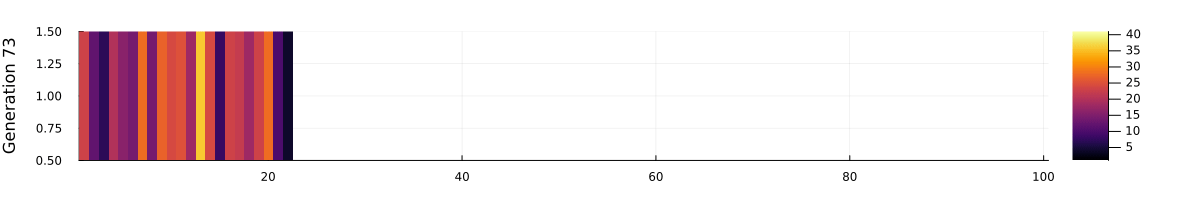

In [8]:
re_heatmap(temp_res["pops"][:,:,1],1,122,200;n_gens_sub=50)